# Proyecto -> Comunicados de Política Monetaria
### Elaboró: Jorge Alberto Morúa Amaya
### Clave: 193699
### 17/03/2020


## Parte 1.

En este notebook crearemos un pandas DataFrame con las decisiones de política monetaria de Banxico y haremos un análisis de la información recabada.

In [71]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from requests_html import HTMLSession
from collections import defaultdict
from unidecode import unidecode
from datetime import datetime
import locale


In [ ]:
locale.setlocale(locale.LC_TIME, "en_EN.UTF-8")

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 4)

La información de decisción de política monetaria se encuentra en la siguiente url.

In [3]:
url = ("https://www.banxico.org.mx/publicaciones-y-prensa/"
      "anuncios-de-las-decisiones-de-politica-monetaria/"
      "anuncios-politica-monetaria-t.html")

* Entra a `url` y analiza la página.

In [4]:
print(url)

https://www.banxico.org.mx/publicaciones-y-prensa/anuncios-de-las-decisiones-de-politica-monetaria/anuncios-politica-monetaria-t.html


* Como podemos observar, la url objetivo contiene
    * las fechas de decisiones de política monetaria,
    * el resumen de las decisiones de política monetaria y
    * una url que nos dirige a un pdf con el texto completo del Anuncio de Política Monetaria.
    
<h3 style="color:crimson">Ejercicio</h3>

1. Por medio de `requests_html`, extrae los tres puntos antes mencionados y guárdalos dentro de un DataFrame con columnas `"date"`, `"text"` y `"url"`;
2. Con el dataframe seleccionado, filtra todos comunicados anteriores al 15 de febrero de 2008, i.e., queremos todos los comunicados a partir del 15 de Febrero de 2008;
3. Guarda tu DataFrame dentro de un archivo `.pkl` con nombre `comunicados-banxico.pkl`: **hint:** Revisa el uso del método `to_pickle`.

In [5]:
with HTMLSession() as sess:
    r = sess.get(url)

In [17]:
divpage = r.html.find("div[id='content']", first=True)

In [31]:
table_row = divpage.find("tr")

In [61]:
values = []
for row in table_row:
    fh_tmp =  row.find("td[class='bmdateview']", first=True).text
    texto = row.find("td[class='bmtextview']",first=True).text
    lnk_tmp = row.find("a",first=True).absolute_links
    lnk= str(lnk_tmp).lstrip("{'").rstrip("'}")
    
    dat = datetime.strptime(fh_tmp,"%d/%m/%y")
    values.append([dat, texto, lnk])    
    

In [82]:
df = pd.DataFrame(values)
df.columns=['date','text','url']
df_final = df[df.date>='2008-02-15']
df_final = df_final.set_index('date')
df_final

,text,url
date,,
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
...,...,...
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


In [84]:
#guardamos el archivo
file = 'comunicados-banxico.pkl'
df_final.to_pickle("./"+file)

In [2]:
file = 'comunicados-banxico.pkl'
#lee el archivo pickle
new_df = pd.read_pickle("./"+file)
new_df

,text,url
date,,
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
...,...,...
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


In [6]:
#ejemplo de como debe de quedar el dataframe

,text,url
date,,
2008-02-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-03-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...


<h3 style="color:crimson">Ejercicio</h3>

Por medio del método `str.extract` para un pandas Series, crea una nueva columna `"category"` que extraiga del texto si la tasa se 
1. `"mantiene"`
2. `"incrementa"`
3. `"disminuye"`

In [9]:
file = 'comunicados-banxico.pkl'
#lee el archivo pickle
data = pd.read_pickle("./"+file)

In [10]:
data['category']= data.text.str.extract('(disminuye|mantiene|incrementa)')
data.index = pd.to_datetime(data.index)

In [11]:
data

,text,url,category
date,,,
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye
...,...,...,...
2008-06-20,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,incrementa
2008-05-16,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene
2008-04-18,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,mantiene


<h3 style="color:crimson">Ejercicio</h3>

Cuenta las veces en las que la tasa se mantuvo, se incrementó o se disminuyó.

In [8]:
#Ejemplo de resultado deseado

mantiene      72
incrementa    18
disminuye     14
Name: category, dtype: int64

In [284]:
#calculos
data.category.groupby(data.category).count().sort_values(ascending=False)

category
mantiene      72
incrementa    18
disminuye     16
Name: category, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Reproduce la siguiente figura sobre los comunicados de prensa de Banxico:
1. La gráfica de la izquierda representa una serie de tiempo sobre los comunicados de banxico. Si `y=1`, la tasa de referencia se incrementó; si `y=0`, la tasa se mantuvo; finalmente, si `y=-1`, la tasa disminuyó.
2. La gráfica de la derecha es una gráfica de barras del ejercicio anterior

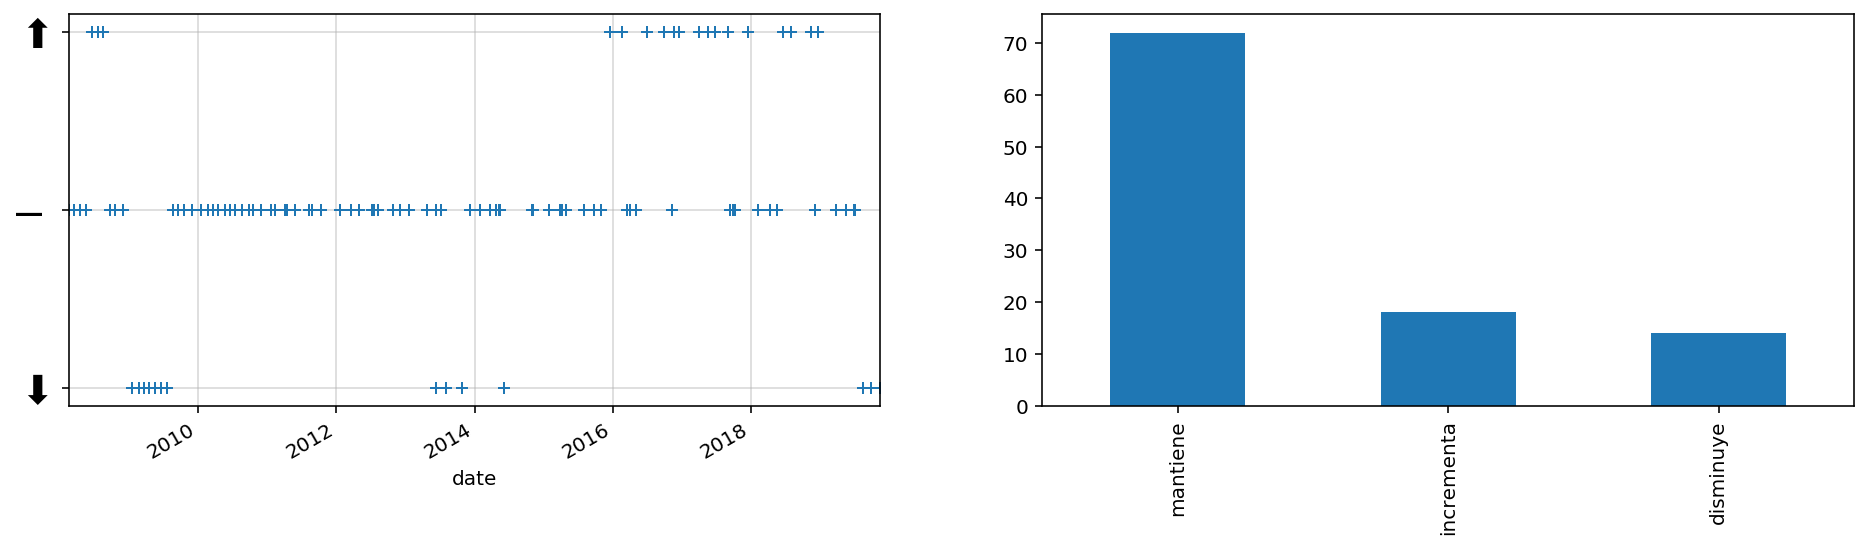

In [11]:
#ejemplo de resultado deseado

In [285]:
#obtiene los valores numericos segun la categoria
test = []
for val in data.category :
    if val == 'mantiene':
        test.append(0)
    elif val == 'incrementa':
        test.append(1)
    else: 
        test.append(-1)
data['cat_value'] = test

In [286]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (18, 5)

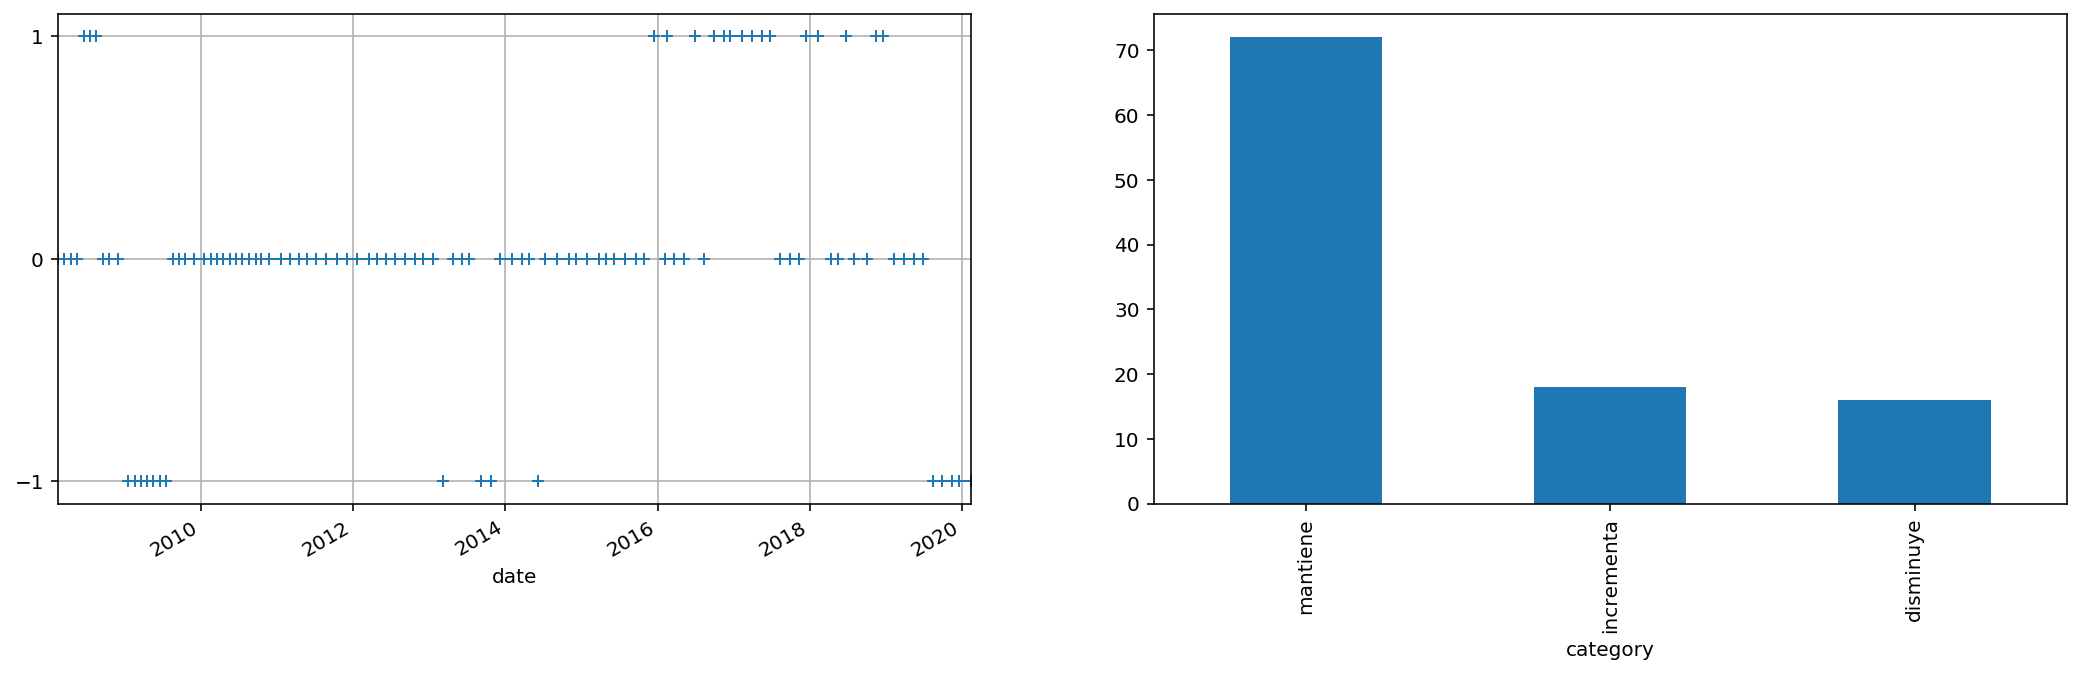

In [287]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

data.plot(style='+',ax=ax1, yticks=[-1,0,1],grid=True, legend=False)
(data.category.groupby(data.category)
              .count()
              .sort_values(ascending=False)
              .plot(kind='bar',ax=ax2))




<h3 style="color:crimson">Ejercicio</h3>

Agrupa por año y cuenta el número de comunicados en un año para cada categoría.

In [80]:
# resultado deseado

date        category  
2008-12-31  mantiene       7
            incrementa     3
2009-12-31  disminuye      7
            mantiene       4
2010-12-31  mantiene      11
Name: category, dtype: int64

In [308]:
data_agg = data.groupby([pd.Grouper(freq="Y"),'category']).count()['text']
data_agg

date        category  
2008-12-31  incrementa     3
            mantiene       7
2009-12-31  disminuye      7
            mantiene       4
2010-12-31  mantiene      11
2011-12-31  mantiene       8
2012-12-31  mantiene       8
2013-12-31  disminuye      3
            mantiene       5
2014-12-31  disminuye      1
            mantiene       7
2015-12-31  incrementa     1
            mantiene       7
2016-12-31  incrementa     5
            mantiene       4
2017-12-31  incrementa     5
            mantiene       3
2018-12-31  incrementa     4
            mantiene       4
2019-12-31  disminuye      4
            mantiene       4
2020-12-31  disminuye      1
Name: text, dtype: int64

<h3 style="color:crimson">Ejercicio</h3>

Con el resultado anterior, replica la siguiente gráfica

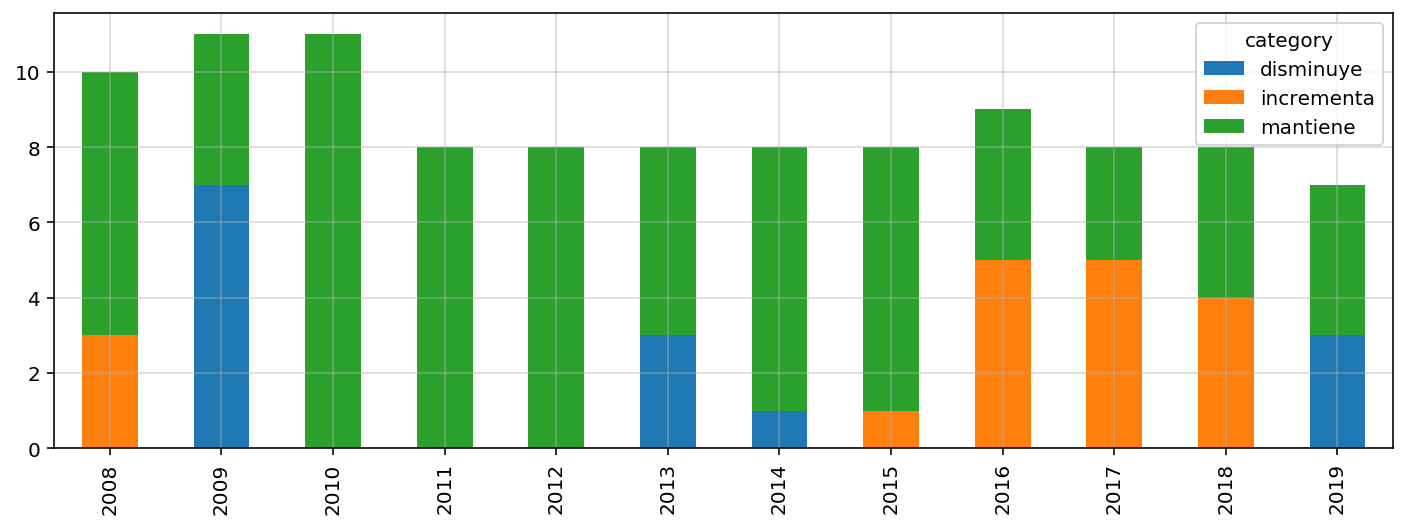

In [78]:
# resultado deseado

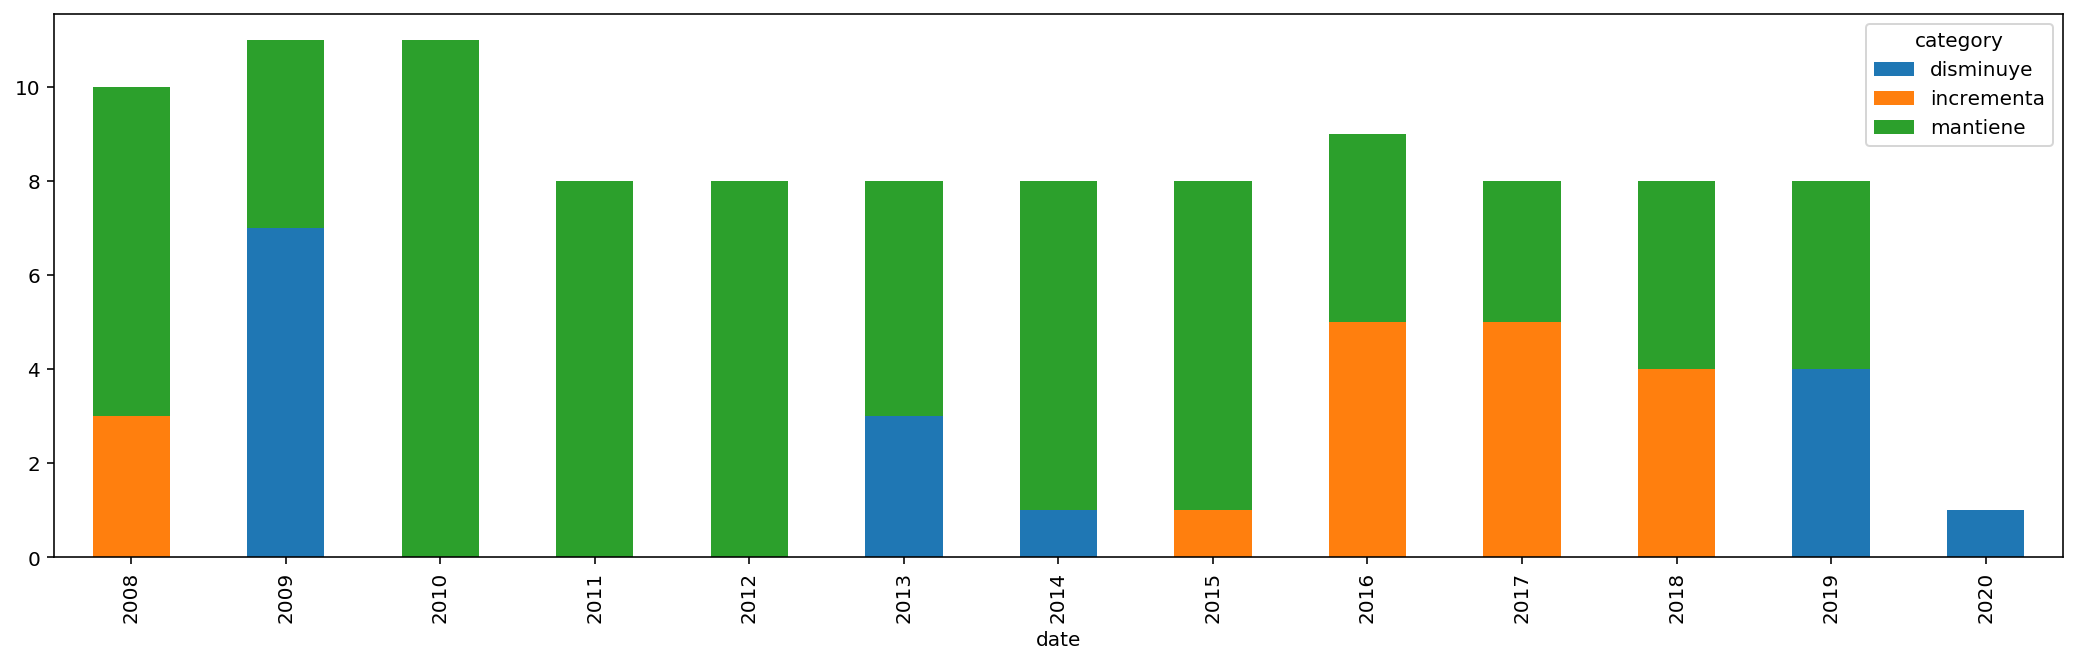

In [329]:
g_apila = data_agg.unstack()
g_apila.index = g_apila.index.year
g_apila.plot(kind='bar',stacked=True,legend=True)

# Banxico Parte 2:

* Ocupando **únicamente** pandas, numpy; matplotlib; seaborn, con la información obtenida en la parte 1 (pandas DataFrame) modelar con Naïve Bayes si un documento dado pertence a la clase `mantiene`, `sube`, `baja`

## Pasos
1. Descargar PDFs
---

In [27]:
import requests
import os
from io import BytesIO
import PyPDF2
from  PyPDF2 import PdfFileReader
from unidecode import unidecode
from collections import defaultdict
from nltk import corpus
import numpy as np

In [15]:
#descargamos los archivos en la carpeta PDF
carpeta = "PDF"
for url,date in zip(data.url, data.index):
    if not os.path.exists("PDF"):
        os.mkdir("PDF")
    archivo = date.strftime("%Y-%m-%d") + '.pdf'
    full_path= os.path.join(carpeta, archivo)
    
    r = requests.get(url)
    docto =r.content
    with open(full_path, "wb") as f:
        f.write(docto)


2. Limpiar los datos y 3. Eliminar de todos los archivo las palabras que contengan `mantiene`, `sube`, `baja`.
---

In [16]:
#lectura de los archivos pdf
from pathlib import Path
#funcion para obtener los archivos de la computadora
def ls(ruta):
    return [arch.name for arch in Path(ruta).iterdir() if arch.is_file()]

In [136]:
lista_arq = ls('./PDF/')
pdf_txt = defaultdict(list)

for file in lista_arq:
    path = os.path.join(carpeta, file)
   # print(path)

    #pdf_document='./PDF/2008-03-14.pdf'
    with open(path, "rb") as filehandle:  
        pdf = PdfFileReader(filehandle)
        pages = pdf.getNumPages()
        
        txt=''
        for pag in range(pages) :
            pg = pdf.getPage(pag)
            txt += pg.extractText()
#            print (pag)

    new_txt = str(unidecode(txt).encode('utf-8')).lower().lstrip("b' ")
    new_txt = new_txt.replace('\\n','')
    #eliminamos las palabras c
    new_txt = (new_txt.replace('mantiene','')                     
                    .replace('sube','')                    
                    .replace('baja',''))
    
    res = ''.join([i for i in new_txt if not i.isdigit()]) 
    res= re.sub("[^\w ]", "", res)
    pdf_txt[file.rstrip(".pdf")].append(res)

In [137]:
df_txt_cln = pd.DataFrame([[k] + v for k,v in pdf_txt.items() ], columns=['date', 'pdf'])
df_txt_cln = df_txt_cln.set_index('date')
df_txt_cln.index = pd.to_datetime(df_txt_cln.index)
df_txt_cln.head()

,pdf
date,
2008-02-15,de febrero de comunicado de prensa anunci...
2009-04-17,de abril de comunicado de prensa anuncio de...
2009-03-20,de marzo de comunicado de prensa anuncio de...
2008-07-18,de julio de comunicado de prensa anuncio de...
2008-03-14,de marzo de comunicado de prensa anuncio d...


In [165]:
#unimos el texto de cada pdf a su respectivo registro de la tabla original (data)
data_pdf = data.join(df_txt_cln,on='date')
data_pdf.head()

,text,url,category,pdf
date,,,,
2020-02-13,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye,comunicado de prensa de febrero...
2019-12-19,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye,de diciembre de comunicado de prensa anun...
2019-11-14,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye,de noviembre de comunicado de prensa anunc...
2019-09-26,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye,de septiembre de comunicado de prensa anu...
2019-08-15,El objetivo para la Tasa de Inter�s Interbanca...,https://www.banxico.org.mx/publicaciones-y-pre...,disminuye,de agosto de comunicado de prensa anuncio...


4. Parte los documentos entre un set de entrenamiento (0.8) y uno de prueba (0.2)
---

In [166]:
# separamos los dataframes por categoria para posteriormente separarlos en 80% train - 20 test
D_D = data_pdf[data_pdf.category == 'disminuye']
D_M = data_pdf[data_pdf.category == 'mantiene']
D_I = data_pdf[data_pdf.category == 'incrementa']

In [140]:
#*************************************************************************************
#codigo para generar la separacion usando sklearn
#*************************************************************************************

from sklearn.model_selection import train_test_split
D_D_train, D_D_test = train_test_split(D_D, test_size=0.2)
D_M_train, D_M_test = train_test_split(D_M, test_size=0.2)
D_I_train, D_I_test = train_test_split(D_I, test_size=0.2)

In [192]:
# dividimos los datos solo con pandas

#disminuye
D_D_train = D_D.sample(frac=0.8, random_state=0)
D_D_test = D_D.drop(D_D_train.index)
#se mantiene
D_M_train = D_M.sample(frac=0.8, random_state=0)
D_M_test = D_M.drop(D_M_train.index)
#incrementa
D_I_train = D_I.sample(frac=0.8, random_state=0)
D_I_test = D_I.drop(D_I_train.index)

In [193]:
print(len(D_M))
print(len(D_M_train))
print(len(D_M_test))

72
58
14


In [194]:
#Obtenemos el valor de N
N1 = len(D_D_train)
N2 = len(D_M_train)
N3 = len(D_I_train)
N = N1 + N2 + N3
print(N)

85


5. Entrena el modelo con los documentos de entrenamiento y valida el resultado con una matriz de confusión usado la base de prueba
---

In [244]:
stopwords = corpus.stopwords.words("spanish")
#eliminamos palabras que se repiten mucho
del_words = ['inflacion','precios','monetaria','ciento','economia','mexico','riesgos','politica','objetivo','actividad','crecimiento']
#del_words =['inflacion']
stopwords.extend(del_words)
stopwords = [unidecode(word) for word in stopwords]

In [245]:
#genera los vectores de palabras para cada categoria
V1 = [palabra for dialogo in D_D_train.pdf for palabra in dialogo.split()
      if palabra not in stopwords]

V2 = [palabra for dialogo in D_M_train.pdf for palabra in dialogo.split()
      if palabra not in stopwords]

V3 = [palabra for dialogo in D_I_train.pdf for palabra in dialogo.split()
      if palabra not in stopwords]

In [246]:
pd.Series(V1).value_counts().head(20)

economica        50
junta            47
interes          43
tasa             43
mayor            40
nivel            40
subyacente       38
base             38
gobierno         37
asi              36
condiciones      33
banco            32
financieros      31
unidos           31
mundial          30
incertidumbre    30
contexto         29
puntos           29
economias        29
balance          28
dtype: int64

In [247]:
pd.Series(V2).value_counts().head(20)

subyacente      193
junta           188
interes         184
tasa            181
economica       177
parte           172
expectativas    170
unidos          153
asi             152
gobierno        146
economias       145
general         142
cambio          141
mantener        140
niveles         134
mercados        133
plazo           130
ano             128
evolucion       124
postura         123
dtype: int64

In [248]:
pd.Series(V3).value_counts().head(20)

expectativas    71
unidos          65
interes         59
ano             57
plazo           54
tasa            53
junta           49
gobierno        48
subyacente      47
mediano         47
largo           44
bien            43
nacional        43
economica       41
entorno         41
cambio          41
asi             40
evolucion       40
alza            39
particular      39
dtype: int64

In [249]:
V = set(V1) | set(V2) | set(V3)
vocab = pd.DataFrame(index=V)

In [250]:
V1_c = pd.Series(V1, name="disminuye").value_counts()
V2_c = pd.Series(V2, name="mantiene").value_counts()
V3_c = pd.Series(V3, name="incrementa").value_counts()

In [251]:
# likelihood
L = (vocab.join(V1_c, how="left")
          .join(V2_c, how="left")
          .join(V3_c, how="left"))
L = L.fillna(0) + 1
L = L / L.sum(axis=0)
L.sample(10, random_state=0)

,disminuye,mantiene,incrementa
cinco,0.000247,0.000036,0.000183
estrecho,0.000123,0.000108,0.000092
contaminado,0.000123,0.000108,0.000092
consumidor,0.000123,0.000576,0.000458
consolidarla,0.000123,0.000144,0.000092
potenciado,0.000123,0.000072,0.000092
relajamientos,0.000247,0.000072,0.000092
retrasado,0.000123,0.000072,0.000092
concretar,0.000123,0.000108,0.000092
proximos,0.000741,0.000432,0.000458


In [252]:
log_L = np.log(L)
log_L.loc[["visto", "elevarse", "referencia", "fortaleza","eventualidad"]].sum(axis=0)

disminuye    -41.308600
mantiene     -39.719713
incrementa   -41.926492
dtype: float64

In [253]:
log_prior_D = np.log(N1 / N)
log_prior_M = np.log(N2 / N)
log_prior_I = np.log(N3 / N)
log_priors = np.array([log_prior_D, log_prior_M, log_prior_I])
log_priors

array([-1.8777019 , -0.38220825, -1.80359393])

In [254]:
#probamos el modelo
#generamos los registros actuales
DF_test = D_D_test.pdf.to_list() + D_M_test.pdf.to_list() + D_I_test.pdf.to_list()

y_test = ["disminuye"] * len(D_D_test) + ["mantiene"] * len(D_M_test) + ["incrementa"] * len(D_I_test)
pd.Series(y_test,name='Actual')

0      disminuye
1      disminuye
2      disminuye
3       mantiene
4       mantiene
5       mantiene
6       mantiene
7       mantiene
8       mantiene
9       mantiene
10      mantiene
11      mantiene
12      mantiene
13      mantiene
14      mantiene
15      mantiene
16      mantiene
17    incrementa
18    incrementa
19    incrementa
20    incrementa
Name: Actual, dtype: object

In [255]:
yhat_test = []

for d_test in DF_test:
    f = set([palabra for palabra in d_test.split() if palabra in V])
    res = log_L.loc[f].sum(axis=0) + log_priors
    yhat_test.append(res.idxmax())

In [256]:
pd.Series(yhat_test,name='Predicted')

0      disminuye
1       mantiene
2      disminuye
3     incrementa
4     incrementa
5       mantiene
6       mantiene
7       mantiene
8       mantiene
9       mantiene
10      mantiene
11      mantiene
12      mantiene
13      mantiene
14     disminuye
15      mantiene
16      mantiene
17    incrementa
18    incrementa
19    incrementa
20      mantiene
Name: Predicted, dtype: object

In [257]:
df_confusion = pd.crosstab(pd.Series(y_test,name='Actual'), 
                           pd.Series(yhat_test,name='Predicted'),
                           rownames=['Actual'], colnames=['Predicted'], margins=True)
#, margins=True
df_confusion

Predicted,disminuye,incrementa,mantiene,All
Actual,,,,
disminuye,2,0,1,3
incrementa,0,3,1,4
mantiene,1,2,11,14
All,3,5,13,21


In [258]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

Predicted,disminuye,incrementa,mantiene,All
Actual,,,,
disminuye,0.333333,0.000,0.035714,0.071429
incrementa,0.000000,0.375,0.035714,0.095238
mantiene,0.166667,0.250,0.392857,0.333333
All,0.500000,0.625,0.464286,0.500000
